#Model 2
In model2 we used same architecture as model1 but filtered words using tfidf.

<img src='https://i.imgur.com/w395Yk9.png'>
ref: https://i.imgur.com/w395Yk9.png

In [0]:
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
import pandas as pd
from keras.layers import Input, Embedding, LSTM, Dense,Concatenate,Dropout
from keras.models import Model
import tensorflow as tf
from keras.layers import Input, Embedding, LSTM, Dense,Flatten
from keras.models import Model
import numpy as np
from sklearn.preprocessing import StandardScaler
from numpy import asarray
from numpy import zeros
from keras.layers.normalization import BatchNormalization
from keras.layers import Activation
from keras import regularizers
from keras import optimizers
from keras.optimizers import SGD
from google.colab import drive
from zipfile import ZipFile
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import pickle
from keras.layers import LeakyReLU
from sklearn import preprocessing
from keras.layers.normalization import BatchNormalization
from keras.layers import Activation
from keras import regularizers
from keras.optimizers import SGD
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

Using TensorFlow backend.


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
project_data=pd.read_csv("/content/drive/My Drive/Assignments_DonorsChoose_2018/preprocessed_data.csv")

In [0]:
project_data.head(2)

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,1,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05
1,ut,ms,grades_3_5,4,1,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03


In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
count_vect = TfidfVectorizer(use_idf=True) 
X_train_vect = count_vect.fit_transform(project_data['essay'].values)
project_data['essay'].values.shape

(109248,)

In [0]:
Idf_Values = count_vect.idf_

In [0]:
print("Maximum IDF value",max(Idf_Values))
print("Minimum IDF value",min(Idf_Values))

Maximum IDF value 11.908237779037922
Minimum IDF value 1.0077093449425296


In [0]:
vocab=count_vect.vocabulary_ 

In [0]:
lst=[]
for index, item in enumerate(Idf_Values, start=0):
   if(item>10 or item<4):
       lst.append(0)
   else:
       lst.append(1)     

In [0]:
dict_list=[]
for i,j in vocab.items():
    dict_list.append((i,j))

In [0]:
lst_words=[]
for index, item in enumerate(lst, start=0):
  if(item ==1):
    lst_words.append(dict_list[index][0])

In [0]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
infile = open('/content/drive/My Drive/final_string','rb')
final_string = pickle.load(infile)
infile.close()

In [0]:
project_data['cleaned_essay']=final_string

In [0]:
project_data['essay'].shape

(109248,)

In [0]:
x_train,X_test,y_train,Y_test=train_test_split(project_data,project_data['project_is_approved'],test_size=0.2,random_state=42)
X_train,X_cv,Y_train,Y_cv=train_test_split(x_train,y_train,test_size=0.2,random_state=42)

In [0]:
t = Tokenizer()
t.fit_on_texts(X_train['cleaned_essay'])
vocab_size = len(t.word_index) + 1
# integer encode the documents
encoded_docs = t.texts_to_sequences(X_train['cleaned_essay'])
print(encoded_docs)
# pad documents to a max length of 4 words
#max_length = 4
padded_docs = pad_sequences(encoded_docs, maxlen=300, padding='post')
print(padded_docs)
# load the whole embedding into memory
embeddings_index = dict()


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[[ 58  44  76 ...   0   0   0]
 [  1 115 231 ...   0   0   0]
 [  1  17  60 ...   0   0   0]
 ...
 [ 14 527 258 ...   0   0   0]
 [ 65   6  50 ...   0   0   0]
 [ 25   1  25 ...   0   0   0]]


In [0]:
with open('/content/drive/My Drive/Assignments_DonorsChoose_2018/glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())
    
# for train
embedding_matrix = np.zeros((vocab_size, 300))
for word, i in t.word_index.items():
    if word in glove_words:
        embedding_vector = model[word]
        embedding_matrix[i] = embedding_vector

In [0]:
encoded_docs_test = t.texts_to_sequences(X_test['cleaned_essay'])
print(encoded_docs_test)
# pad documents to a max length of 4 words
#max_length = 4
padded_docs_test = pad_sequences(encoded_docs_test, maxlen=300, padding='post')
print(padded_docs_test)
# load the whole embedding into memory

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[[   23   883     1 ...     0     0     0]
 [12734   193   434 ...     0     0     0]
 [    6    45  2956 ...     0     0     0]
 ...
 [    1     2    10 ...     0     0     0]
 [    6   385  1799 ...     0     0     0]
 [  621   206   236 ...     0     0     0]]


In [0]:
encoded_docs_cv = t.texts_to_sequences(X_cv['cleaned_essay'])
print(encoded_docs_cv)

# pad documents to a max length of 4 words
#max_length = 4

padded_docs_cv = pad_sequences(encoded_docs_cv, maxlen=300, padding='post')
print(padded_docs_cv)

# load the whole embedding into memory

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [0]:
# Headline input: meant to receive sequences of 100 integers, between 1 and 10000.
# Note that we can name any layer by passing it a "name" argument.
Input_Essay = Input(shape=(300,),  name='Input_Essay')

# This embedding layer will encode the input sequence
# into a sequence of dense 512-dimensional vectors.
embedding_essay = Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=300,trainable = False)(Input_Essay)

# A LSTM will transform the vector sequence into a single vector,
# containing information about the entire sequence

#lr= LeakyReLU(alpha = 0.3)(embedding_essay)
lstm_out = LSTM(300,return_sequences=True)(embedding_essay)
flatten_Essay = Flatten()(lstm_out)

#School_State

In [0]:
le_school_state = preprocessing.LabelEncoder()
Label_encoded_school_state=le_school_state.fit_transform(X_train['school_state'])
Label_encoded_school_state_cv=le_school_state.transform(X_cv['school_state'])
Label_encoded_school_state_test=le_school_state.transform(X_test['school_state'])

In [0]:
padded_docs_school_state=Label_encoded_school_state
padded_docs_cv_school_state=Label_encoded_school_state_cv
padded_docs_test_school_state=Label_encoded_school_state_test

In [0]:
vocab_size_school_state = le_school_state.classes_
vocab_size_school_state_len=len(vocab_size_school_state)

In [0]:
Input_School_State_1 = Input(shape=(1,),  name='Input_School_State')

embedding_school_state_1=Embedding(vocab_size_school_state_len, 32, input_length=1)(Input_School_State_1)
flatten_School_State_1 = Flatten()(embedding_school_state_1)

#teacher_prefix

In [0]:
le_teacher_prefix = preprocessing.LabelEncoder()
Label_encoded_teacher_prefix=le_teacher_prefix.fit_transform(X_train['teacher_prefix'])
Label_encoded_teacher_prefix_cv=le_teacher_prefix.transform(X_cv['teacher_prefix'])
Label_encoded_teacher_prefix_test=le_teacher_prefix.transform(X_test['teacher_prefix'])

In [0]:
padded_docs_teacher_prefix=Label_encoded_teacher_prefix
padded_docs_cv_teacher_prefix=Label_encoded_teacher_prefix_cv
padded_docs_test_teacher_prefix=Label_encoded_teacher_prefix_test

In [0]:
vocab_size_teacher_prefix_len=len(le_teacher_prefix.classes_)

In [0]:
Input_teacher_prefix_1 = Input(shape=(1,),  name='Input_teacher_prefix_1')

embedding_teacher_prefix_1=Embedding(vocab_size_teacher_prefix_len, 32, input_length=1)(Input_teacher_prefix_1)
flatten_teacher_prefix_1 = Flatten()(embedding_teacher_prefix_1)

#grade_category

In [0]:
le_grade_category = preprocessing.LabelEncoder()
Label_encoded_grade_category=le_grade_category.fit_transform(X_train['project_grade_category'])

In [0]:
Label_encoded_grade_category_cv=le_grade_category.transform(X_cv['project_grade_category'])

In [0]:
Label_encoded_grade_category_test=le_grade_category.transform(X_test['project_grade_category'])
vocab_size_grade_category_len=len(le_grade_category.classes_)

In [0]:
padded_docs_project_grade_category=Label_encoded_grade_category
padded_docs_cv_project_grade_category=Label_encoded_grade_category_cv
padded_docs_test_project_grade_category=Label_encoded_grade_category_test

In [0]:
Input_grade_category_1 = Input(shape=(1,),  name='Input_grade_category_1')
embedding_grade_category_1=Embedding(vocab_size_grade_category_len, 32, input_length=1)(Input_grade_category_1)
flatten_grade_category_1 = Flatten()(embedding_grade_category_1)

#clean_categories

In [0]:
le_clean_categories = preprocessing.LabelEncoder()
Label_encoded_clean_categories=le_clean_categories.fit_transform(X_train['clean_categories'])

In [0]:
Label_encoded_clean_categories_cv=le_clean_categories.transform(X_cv['clean_categories'])

In [0]:
Label_encoded_clean_categories_test=le_clean_categories.transform(X_test['clean_categories'])

In [0]:
padded_docs_clean_categories=Label_encoded_clean_categories
padded_docs_cv_clean_categories=Label_encoded_clean_categories_cv
padded_docs_test_clean_categories=Label_encoded_clean_categories_test

In [0]:
vocab_size_grade_category_len=len(le_clean_categories.classes_)

In [0]:
Input_clean_categories_1 = Input(shape=(1,),  name='Input_clean_categories_1')

embedding_clean_categories_1=Embedding(vocab_size_grade_category_len, 32, input_length=1)(Input_clean_categories_1)
flatten_clean_categories_1 = Flatten()(embedding_clean_categories_1)

#clean_subcategories

In [0]:
clean_subcategories_dict=dict()

i=1

for sent in X_train['clean_subcategories']:
    if sent not in clean_subcategories_dict:
        clean_subcategories_dict[sent]=i
        i=i+1

vocab_size_clean_subcategories=len(clean_subcategories_dict)


In [0]:
Label_clean_subcategories=[]
for sent in X_train['clean_subcategories']:
    try:
        Label_clean_subcategories.append(clean_subcategories_dict[sent])
      
    except:
        Label_clean_subcategories.append(0)
        
padded_docs_clean_subcategories = Label_clean_subcategories   

padded_docs_clean_subcategories = np.asarray(padded_docs_clean_subcategories)

In [0]:
#Label_encoded_clean_subcategories_test
padded_docs_cv_clean_subcategories=[]
Label_encoded_clean_subcategories_cv=[]
for sent in X_cv['clean_subcategories']:
    try:
        Label_encoded_clean_subcategories_cv.append(clean_subcategories_dict[sent])
      
    except:
        Label_encoded_clean_subcategories_cv.append(0)

padded_docs_cv_clean_subcategories=Label_encoded_clean_subcategories_cv
padded_docs_cv_clean_subcategories = np.asarray(padded_docs_cv_clean_subcategories)

In [0]:
padded_docs_test_clean_subcategories=[]
Label_encoded_clean_subcategories_test=[]
for sent in X_test['clean_subcategories']:
    try:
        Label_encoded_clean_subcategories_test.append(clean_subcategories_dict[sent])
      
    except:
        Label_encoded_clean_subcategories_test.append(0)
        

padded_docs_test_clean_subcategories=Label_encoded_clean_subcategories_test

In [0]:
#padded_docs_clean_subcategories = np.asarray(padded_docs_clean_subcategories)
padded_docs_test_clean_subcategories=np.asarray(padded_docs_test_clean_subcategories)

In [0]:
Input_clean_subcategories_1 = Input(shape=(1,), name='Input_clean_subcategories_1')
  
embedding_clean_subcategories_1=Embedding(vocab_size_clean_subcategories, 28, input_length=1)(Input_clean_subcategories_1)
flatten_clean_subcategories_1 = Flatten()(embedding_clean_subcategories_1)

#teacher_number_of_previously_posted_projects

In [0]:
rem_input_train = np.concatenate((X_train['price'].values.reshape(-1,1),X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)), axis=1)
rem_input_cv =    np.concatenate((X_cv['price'].values.reshape(-1,1),X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)), axis=1)
rem_input_test = np.concatenate((X_test['price'].values.reshape(-1,1),X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)), axis=1)

In [0]:
#from sklearn.preprocessing import StandardScalar
mms = StandardScaler().fit(rem_input_train)
rem_input_train_norm = mms.transform(rem_input_train)
rem_input_cv_norm = mms.transform(rem_input_cv)
rem_input_test_norm = mms.transform(rem_input_test)

In [0]:
remaining_input = Input(shape=(2,), name='remaining_input')
dense_1 = Dense(1, activation='relu',kernel_initializer="uniform")(remaining_input)

In [0]:
def auc(y_true,y_pred):
    return tf.py_func(roc_auc_score, (y_true, y_pred), tf.double)

In [0]:
x = Concatenate()([flatten_Essay, flatten_School_State_1,flatten_teacher_prefix_1,flatten_grade_category_1,flatten_clean_categories_1,flatten_clean_subcategories_1,dense_1])

In [0]:
x = Dense(128, activation='relu',kernel_initializer="he_normal",kernel_regularizer=regularizers.l2(0.001))(x)
x=  Dropout(0.5)(x)


x = Dense(64, activation='relu',kernel_initializer="he_normal",kernel_regularizer=regularizers.l2(0.001))(x)
x=  Dropout(0.5)(x)
x = BatchNormalization()(x)

x = Dense(64, activation='relu',kernel_initializer="he_normal",kernel_regularizer=regularizers.l2(0.001))(x)
x=  Dropout(0.5)(x)

main_output = Dense(1, activation='sigmoid', name='main_output')(x)



Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
learning_rate = 0.001
decay_rate = learning_rate / 10
#optimizers.Adam,optimizers.Nadam,optimizers.RMSprop
#from keras.optimizers import Adam
model2 = Model(inputs=[Input_Essay,Input_School_State_1,Input_teacher_prefix_1,Input_grade_category_1,Input_clean_categories_1,Input_clean_subcategories_1,remaining_input], outputs=[main_output])
#adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
#lr=0.01,
#decay=decay_rate
adam = optimizers.Adam(lr=0.001)
model2.compile(loss="binary_crossentropy", optimizer=adam, metrics=[auc])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
tf.py_func is deprecated in TF V2. Instead, there are two
    options available in V2.
    - tf.py_function takes a python function which manipulates tf eager
    tensors instead of numpy arrays. It's easy to convert a tf eager tensor to
    an ndarray (just call tensor.numpy()) but having access to eager tensors
    means `tf.py_function`s can use accelerators such as GPUs as well as
    being differentiable using a gradient tape.
    - tf.numpy_function maintains the semantics of the deprecated tf.py_func
    (it is not differentiable, and manipulates numpy arrays). It drops the
    stateful argument making all functions stateful.
    


In [0]:
model2.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input_Essay (InputLayer)        (None, 300)          0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 300, 300)     8628900     Input_Essay[0][0]                
__________________________________________________________________________________________________
Input_School_State (InputLayer) (None, 1)            0                                            
__________________________________________________________________________________________________
Input_teacher_prefix_1 (InputLa (None, 1)            0                                            
____________________________________________________________________________________________

In [0]:
model_2=model2.fit([padded_docs, padded_docs_school_state,padded_docs_teacher_prefix,padded_docs_project_grade_category,padded_docs_clean_categories,padded_docs_clean_subcategories,rem_input_train_norm],Y_train,epochs=15 ,batch_size=1002,validation_data=([padded_docs_cv,padded_docs_cv_school_state,padded_docs_cv_teacher_prefix,padded_docs_cv_project_grade_category,padded_docs_cv_clean_categories,padded_docs_cv_clean_subcategories,rem_input_cv_norm], Y_cv))



Train on 69918 samples, validate on 17480 samples
Epoch 1/15
69918/69918 [==============================] - 40s 579us/step - loss: 0.9948 - auc: 0.5369 - val_loss: 0.8197 - val_auc: 0.4808
Epoch 2/15
69918/69918 [==============================] - 38s 546us/step - loss: 0.7457 - auc: 0.5908 - val_loss: 0.6712 - val_auc: 0.6167
Epoch 3/15
69918/69918 [==============================] - 38s 546us/step - loss: 0.6384 - auc: 0.6220 - val_loss: 0.6287 - val_auc: 0.6742
Epoch 4/15
69918/69918 [==============================] - 38s 544us/step - loss: 0.5784 - auc: 0.6494 - val_loss: 0.5695 - val_auc: 0.6773
Epoch 5/15
69918/69918 [==============================] - 38s 545us/step - loss: 0.5448 - auc: 0.6697 - val_loss: 0.5647 - val_auc: 0.6998
Epoch 6/15
69918/69918 [==============================] - 38s 545us/step - loss: 0.5183 - auc: 0.6833 - val_loss: 0.5344 - val_auc: 0.7015
Epoch 7/15
69918/69918 [==============================] - 38s 545us/step - loss: 0.4930 - auc: 0.6953 - val_loss: 

In [0]:
model2_history=model2.predict([padded_docs_test,padded_docs_test_school_state,padded_docs_test_teacher_prefix,padded_docs_test_project_grade_category,padded_docs_test_clean_categories,padded_docs_test_clean_subcategories,rem_input_test_norm])

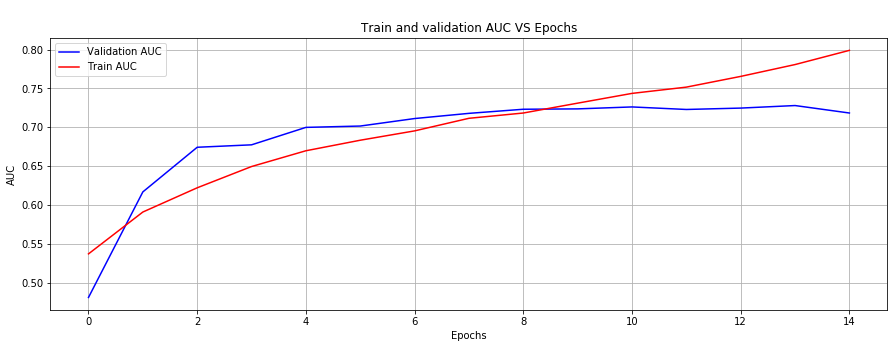

In [0]:
x = list(range(15))
vy = model_2.history['auc']
ty = model_2.history['val_auc']
plt.figure(figsize=(15,5))
plt.plot(x, ty, 'b', label="Validation AUC")
plt.plot(x, vy, 'r', label="Train AUC")
plt.xlabel('Epochs') 
plt.ylabel('AUC')
plt.title('\nTrain and validation AUC VS Epochs')
plt.legend()
plt.grid()
plt.show()

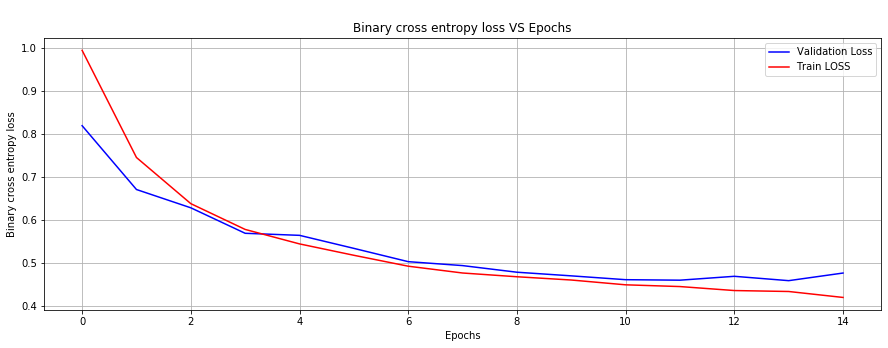

In [0]:
import matplotlib.pyplot as plt

x = list(range(15))
vy = model_2.history['loss']
ty = model_2.history['val_loss']
plt.figure(figsize=(15,5))
plt.plot(x, ty, 'b', label="Validation Loss")
plt.plot(x, vy, 'r', label="Train LOSS")
plt.xlabel('Epochs') 
plt.ylabel('Binary cross entropy loss')
plt.title('\nBinary cross entropy loss VS Epochs')
plt.legend()
plt.grid()
plt.show()

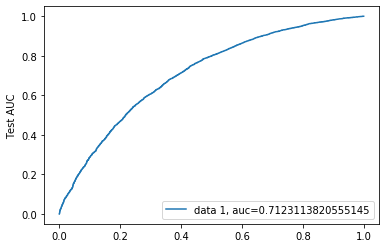

In [0]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr, tpr, _ = roc_curve(Y_test,  model2_history)
auc = roc_auc_score(Y_test, model2_history)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
#plt.xlabel('Epochs') 
plt.ylabel('Test AUC')
plt.show()